# How to calculate distances on the Earth

Here, we demonstrate a few different approaches to calculate the distance between coordinates on the Earth's surface.

In [2]:
from geopy import distance
from pyproj import Geod
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Define some arbitrary coordinates

In [12]:
# lat1, lon1, lat2, lon2 = (16, -60, 16, -45)
lat1, lon1, lat2, lon2 = (51.53, -0.08, 43.17, 132)

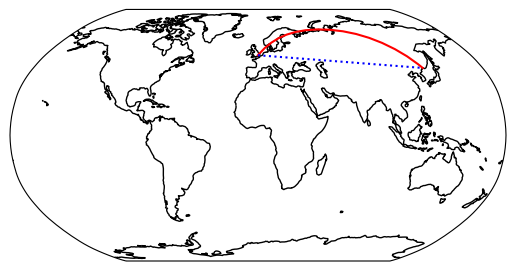

In [46]:
ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()

plt.plot((lon1, lon2), (lat1, lat2), color='red',  transform=ccrs.Geodetic())
plt.plot((lon1, lon2), (lat1, lat2), color='blue', ls=':', transform=ccrs.PlateCarree());

## Pyproj
The first example makes use of the `pyproj.Geod` object. 
Its method `geometry_leth` accepts a `shapely.geometry.LineString` object and returns the distance in meters.

In [15]:
# only for the first example
ls = LineString([(lon1, lat1), (lon2, lat2)])   # ← keep in mind the reverse order compared to the other following examples!
geod = Geod(ellps="WGS84")

In [16]:
# %%timeit  # 12 µs ± 22.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
geod.geometry_length(ls)/1e3

8542.610993959972

## Geopy
The second to fourth example make use of the `geopy` library.
All methods accept tuples of (lat, lon) values.
The fastest results are obtained with the function `great_circle`.
However, one should keep in mind that this uses a very simplified "model" of the Earth.
More accurate results are obtained with the methods `distance` and `geodesic`.

In [17]:
# %%timeit  # 6.7 µs ± 11.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
distance.great_circle((lat1, lon1), (lat2, lon2)).km

8518.581851143874

In [18]:
# %%timeit  # 141 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
distance.distance((lat1, lon1), (lat2, lon2)).km

8542.610993959972

In [19]:
# %%timeit  # 143 µs ± 415 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
distance.geodesic((lat1, lon1), (lat2, lon2), ellipsoid='WGS-84').km

8542.610993959972

## Conclusions
Depending on how many coordinates you have, you might choose a method with a shorter runtime.
However, if accuracy is important, you should choose one of the other methods.
